In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pmdarima as pm

In [2]:
!ls

Auto-ARIMA.ipynb                     VAR.ipynb
ETTh1.csv                            etth1-forecastingneuralprophet.ipynb
ETTh2.csv                            lightning_logs


In [3]:
mdata = pd.read_csv('ETTh2.csv')
mdata.set_index('date', inplace = True)

In [4]:
mdata

,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
date,,,,,,,
2016-07-01 00:00:00,41.130001,12.481,36.535999,9.355,4.424,1.311,38.661999
2016-07-01 01:00:00,37.528000,10.136,33.936001,7.532,4.435,1.215,37.124001
2016-07-01 02:00:00,37.946999,11.309,35.330002,9.007,2.100,0.000,36.465000
2016-07-01 03:00:00,38.952000,11.895,35.543999,9.436,3.380,1.215,33.608501
2016-07-01 04:00:00,38.113998,11.476,35.410000,9.623,2.036,0.000,31.850500
...,...,...,...,...,...,...,...
2018-06-26 15:00:00,39.202999,11.392,49.644001,11.929,-10.331,-1.258,47.084999
2018-06-26 16:00:00,38.113998,10.974,48.759998,11.366,-10.331,-1.290,48.183498
2018-06-26 17:00:00,39.622002,10.974,50.609001,11.661,-11.557,-1.418,48.183498


In [7]:
model = pm.auto_arima(mdata['OT'], 
                        m=12, seasonal=True,
                      start_p=0, start_q=0, max_order=4, test='adf',error_action='ignore',  
                           suppress_warnings=True,
                      stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=107332.511, Time=12.87 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=135687.045, Time=0.15 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=7.66 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=106754.142, Time=7.23 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=166927.158, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=112992.083, Time=1.06 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=86278.179, Time=18.91 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=94690.300, Time=9.62 sec
 ARIMA(0,0,1)(2,0,1)[12] intercept   : AIC=78086.178, Time=68.74 sec
 ARIMA(0,0,1)(2,0,0)[12] intercept   : AIC=79636.767, Time=65.81 sec
 ARIMA(0,0,1)(2,0,2)[12] intercept   : AIC=inf, Time=76.60 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=84011.312, Time=66.21 sec
 ARIMA(0,0,0)(2,0,1)[12] intercept   : AIC=97442.972, Time=53.71 sec
 ARIMA(1,0,1)(2,0,1)[12] intercept   : AIC=47315.408, Time=65.07 sec
 ARI

In [39]:
train=mdata[(mdata.index<"2017-12-26 17:00:00")]
test=mdata[(mdata.index>="2017-12-26 17:00:00")]

In [40]:
train.shape


(13049, 7)

In [41]:
test.shape

(4371, 7)

In [42]:
model.fit(train["OT"])

ARIMA(order=(2, 0, 2), scoring_args={}, seasonal_order=(2, 0, 0, 12),
      suppress_warnings=True)

In [43]:
forecast = model.predict(n_periods=4371, return_conf_int=True)

In [44]:
forecast_df = pd.DataFrame(forecast[0],index = test.index,columns=['Prediction'])

In [45]:
forecast_df

,Prediction
date,
2017-12-26 17:00:00,22.264055
2017-12-26 18:00:00,21.592695
2017-12-26 19:00:00,21.011102
2017-12-26 20:00:00,20.594520
2017-12-26 21:00:00,20.334538
...,...
2018-06-26 15:00:00,27.898421
2018-06-26 16:00:00,27.898421
2018-06-26 17:00:00,27.898421


In [46]:
import matplotlib.pyplot as plt

<Axes: xlabel='date'>

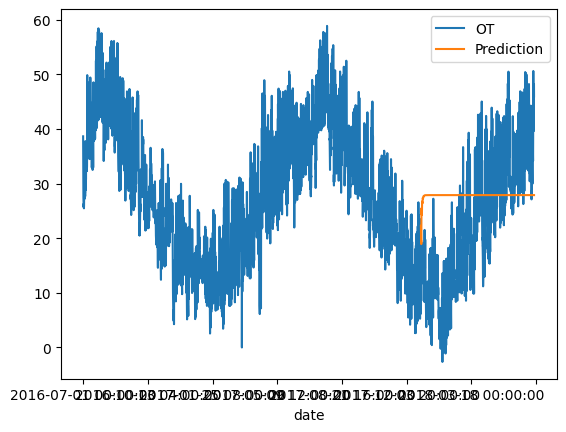

In [47]:
pd.concat([mdata['OT'],forecast_df],axis=1).plot()